# Introducción a regresión lineal

En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.


## Conociendo nuestros datos

El conjunto de datos "Housing" del repositorio de aprendizaje automático de la Universidad de California en Irvine (UCI) es uno de los conjuntos de datos más utilizados en la enseñanza de técnicas de regresión y análisis de datos.

El conjunto de datos contiene 506 registros y 14 atributos, que incluyen información como la tasa de impuesto a la propiedad, la proporción de habitaciones por vivienda ocupada, la tasa de criminalidad per cápita, entre otros.

1. CRIM: tasa de delincuencia per cápita por ciudad

2. ZN: proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados

3. INDUS: proporción de acres de negocios no minoristas por ciudad

4. CHAS: variable ficticia del río Charles (= 1 si la parcela limita con el río; 0 en caso contrario)

5. NOX: concentración de óxidos nítricos (partes por cada 10 millones)

6. RM: número promedio de habitaciones por vivienda

7. AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

8. DIS: distancias ponderadas a cinco centros de empleo de Boston

9. RAD: índice de accesibilidad a carreteras radiales

10. TAX: tasa de impuesto sobre la propiedad de valor total por cada $10,000

11. PTRATIO: relación alumno-maestro por ciudad

12. B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

13. LSTAT: % de estatus social bajo de la población

14. MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)


## Importando datos


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

house_df = pd.read_csv("../data/housing.data", header=None, sep="\s+")

house_df.columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]

house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos

Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

## Análisis de datos para tu primera regresión lineal

Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **pairplot** de `Seaborn` con las siguientes variables objetivos:

- DIS: distancias ponderadas a cinco centros de empleo de Boston

- INDUS: proporción de acres de negocios no minoristas por ciudad

- CRIM: tasa de delincuencia per cápita por ciudad

- RM: número promedio de habitaciones por vivienda

- MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)


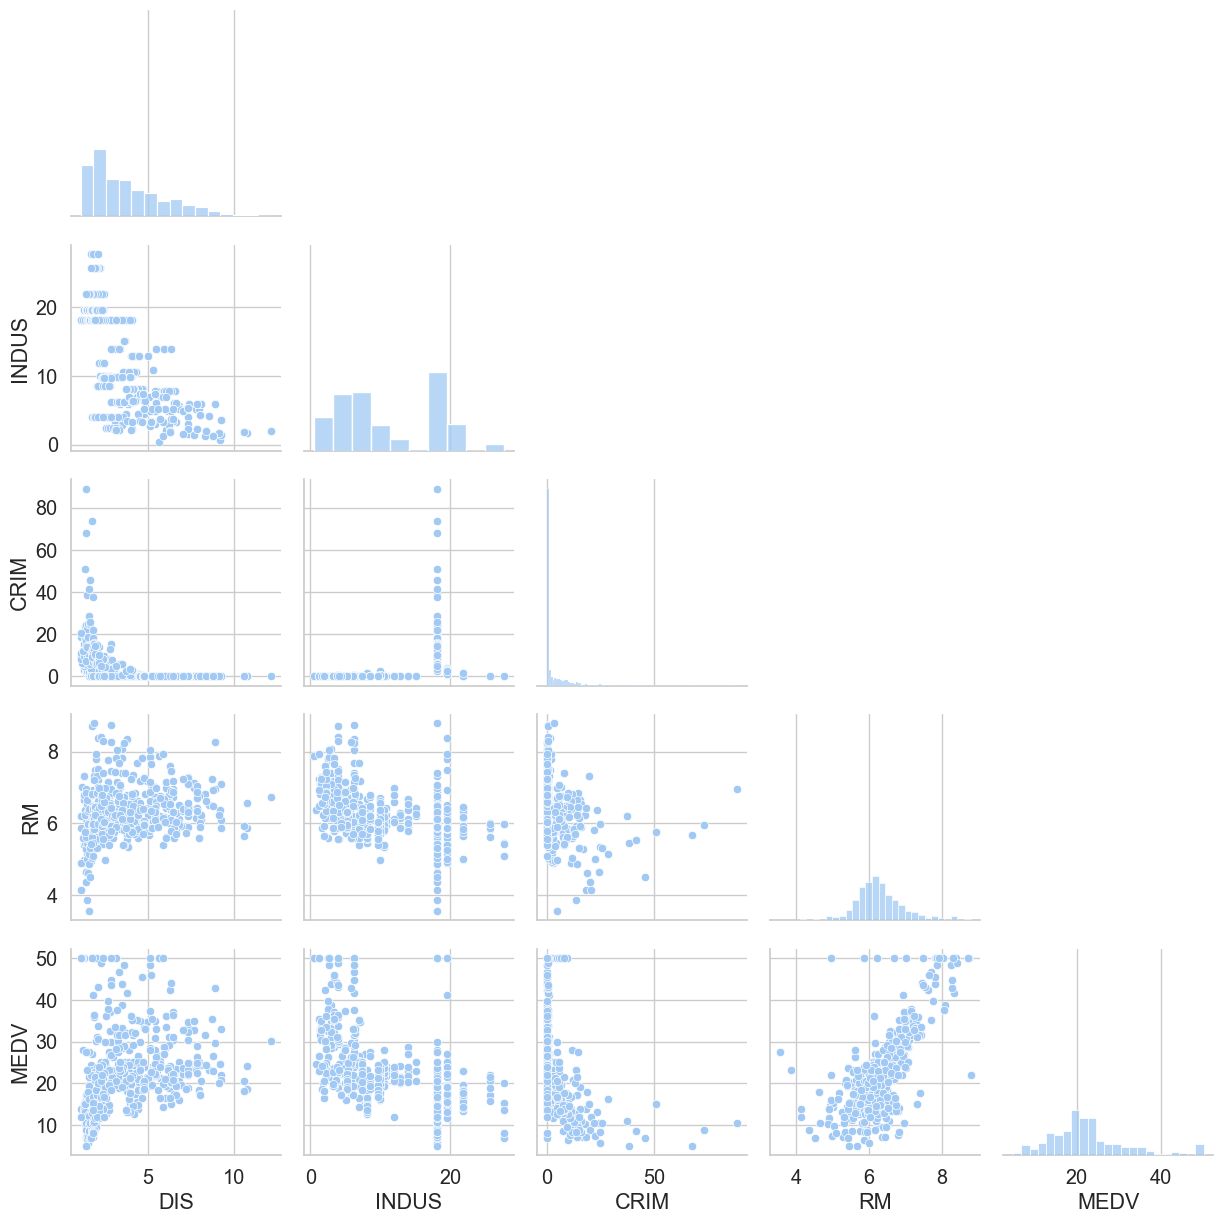

In [8]:
# Dar estilos predefinidos
sns.set_theme(style="whitegrid", context="notebook", palette="pastel", font_scale=1.3)

# Escoger 5 variables importantes para hacer relaciones entre ellas y como se distribuyen entre ellas
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]

# Hacer el primer grafico
sns.pairplot(house_df[cols], height=2.5, corner=True)

plt.tight_layout()

plt.show()

## Insight

Al observar la distribución de la variable **MEDV**, podemos ver que se asemeja a una **distribución normal** con algunos valores atípicos. Esto es importante porque **MEDV es la variable objetivo que se desea predecir**. Si la variable objetivo sigue una distribución normal, es más fácil y preciso construir un modelo que pueda predecir su valor.

Además, la variable **RM** también muestra un similitud a una distribución normal. En este caso, se puede observar una **tendencia lineal positiva entre RM y MEDV**, lo que **sugiere que a medida que aumenta el valor de RM, también aumenta el valor de MEDV**. Por lo tanto, se podría utilizar esta relación para construir un **modelo de regresión lineal** que prediga el valor de MEDV en función de RM.


## Análisis numérico

Al realizar un **análisis visual** de un conjunto de datos, **se obtienen ideas generales de las relaciones entre las variables y patrones**. Sin embargo, es importante complementarlo con un **análisis numérico** para confirmar que nuestras suposiciones para confirmar si son correctas.

**El análisis numérico** puede incluir el cálculo de medidas estadísticas como la **media, la mediana y la desviación estándar**, así como la realización de pruebas de hipótesis y la evaluación de correlaciones entre variables.

En este caso, **se observa una relación aparentemente lineal**, por lo cual es **necesario calcular la correlación numérica para determinar si es significativa y cuánto es su fuerza**. Asimismo, en **cuanto a los valores atípicos**, es necesario analizar numéricamente su **impacto en las medidas estadísticas** y determinar si deben ser excluidos o si representan información importante.


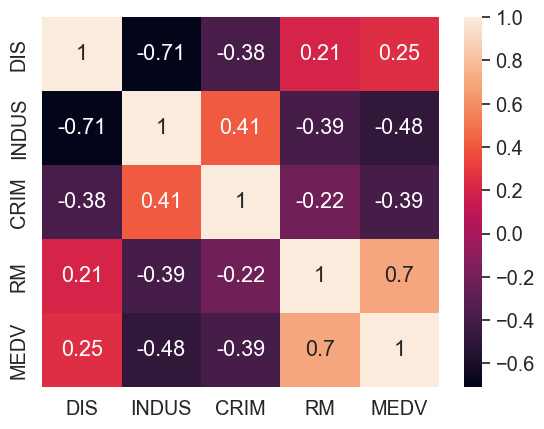

In [13]:
# cm = np.corrcoef(house_df[cols].values.T)
# sns.set_theme(font_scale=1.3)
sns.heatmap(
    house_df[cols].corr(), cbar=True, annot=True, yticklabels=cols, xticklabels=cols
)
plt.show()

## Insight

- En particular, se observó que la correlación entre las variables RM y MEDV es positiva y relativamente alta en comparación con las demás variables. Esto significa que a **medida que aumenta el número promedio de habitaciones por vivienda (RM), también tiende a aumentar el valor mediano de las viviendas ocupadas por sus propietarios (MEDV)**.

La correlación entre INDUS y DIS es negativa, es decir, esto podría indicar que a **medida que una ciudad tiene una mayor cantidad de negocios no minoristas, es más probable que se encuentre cerca de los centros de empleo de Boston**.

la correlación entre valor mediano de las viviendas ocupadas por sus propietarios (MEDV) y la proporción de acres de negocios no minoristas por ciudad (INDUS) es de -0.483. Esta correlación negativa sugiere que **a medida que aumenta la proporción de acres de negocios no minoristas por ciudad (INDUS), el valor mediano de viviendas ocupadas por el propietario (MEDV) tiende a disminuir**.


## Creando modelo con scikit-learn

### Que es un modelo de regresion lineal?

Un modelo de regresión lineal se utiliza para encontrar la línea recta que mejor se ajusta a los datos y que se puede utilizar para hacer predicciones sobre nuevos datos. La fórmula incluye términos de intercepción y coeficiente de regresión, y el objetivo del modelo es minimizar la suma de los cuadrados de los errores para obtener la mejor línea recta.

Ahora realizaremos un modelo de regresión lineal simple para predecir el precio de una casa (variable dependiente) en función del promedio de habitaciones (variable independiente).

La idea del siguiente ejercicio es ver como se utiliza un modelo de regresión lineal simple para predecir la mediana del precio de las casas en Boston a partir del número promedio de habitaciones.


In [16]:
# Escalamiento de los datos -> ajustando el modelo
from sklearn.preprocessing import StandardScaler

# importar el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

# Definir las variables dependientes y independientes
X = house_df["RM"].values.reshape(-1, 1)  # Variable independiente
y = house_df["MEDV"].values.reshape(-1, 1)  # Variable dependiente

# Instanciamos el modelo de escalamiento de los datos
sc_x = StandardScaler()
sc_y = StandardScaler()

# Ajustar los datos estandarizados z = (x - u) / std
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(y)

# Instanciamos y ajustamos el modelo de regresión lineal
slr = LinearRegression()
# Entrenar el modelo con los datos estandarizado
slr.fit(X_std, Y_std)

LinearRegression()

## Análisis de resultados


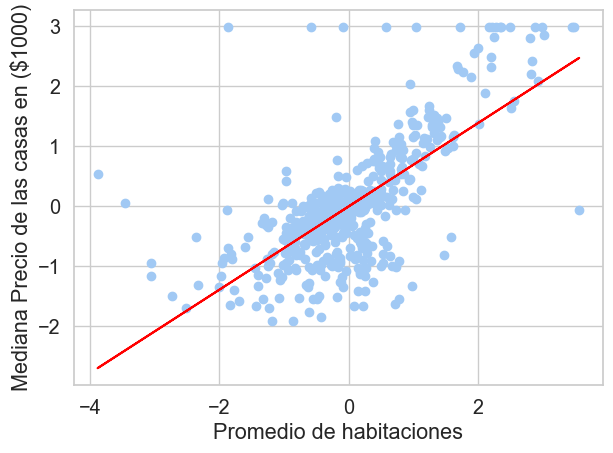

In [17]:
# Graficar

plt.scatter(X_std, Y_std)
# Graficar la linea recta con prediccion
plt.plot(X_std, slr.predict(X_std), color="red")
plt.ylabel("Mediana Precio de las casas en ($1000)")
plt.xlabel("Promedio de habitaciones")


plt.tight_layout()
plt.show()

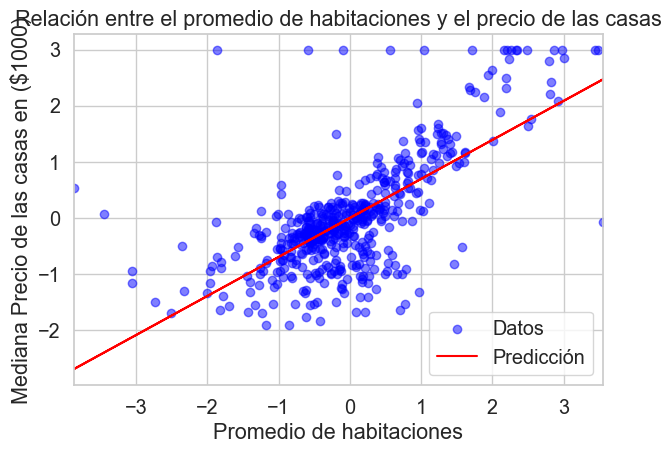

In [18]:
# Graficar los puntos
plt.scatter(X_std, Y_std, color="blue", alpha=0.5, label="Datos")

# Graficar la línea de predicción
plt.plot(X_std, slr.predict(X_std), color="red", label="Predicción")

# Etiquetas de los ejes
plt.ylabel("Mediana Precio de las casas en ($1000)")
plt.xlabel("Promedio de habitaciones")

# Título
plt.title("Relación entre el promedio de habitaciones y el precio de las casas")

# Leyenda
plt.legend()

# Ajustar los márgenes para evitar que los bordes de la gráfica se corten
plt.margins(x=0)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

## Generando predicción con el modelo


In [19]:
# Representamos el numero de habitaciones de la casa que queremos predecir
num_habitaciones = 5



# Estandarizamos sc_x para predecir el predio de la casa



num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1, 1))



# Usamos la transformada inversa en el resultado para volver a la escala original

price = sc_y.inverse_transform(slr.predict(num_habitaciones_std))

print(

    f"El precio de una casa con 5 habitaciones en boston es de: ${price.item(0) * 1000}"
)

El precio de una casa con 5 habitaciones en boston es de: $10839.924129462986
